In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

In [8]:
import os
import cv2
from tqdm import tqdm

In [9]:
class_name=["cats","dogs"]
label_name={class_name: i for i, class_name in enumerate(class_name)}

In [10]:
image_shape=(128,128)

In [33]:
def data_set_load():
    
    data_path=["D:/Projects/Deep Learning/Week_2/Logistic_Regression_as_a_Neural_Network/datasets/training_set/","D:/Projects/Deep Learning/Week_2/Logistic_Regression_as_a_Neural_Network/datasets/test_set"]

    image_data_output=[]
    for i in data_path:
        image_data=[]
        label_data=[]
        print("Counting:{}".format(i))
        
        for j in os.listdir(i):
            label=label_name[j]
            for image_data_file in tqdm(os.listdir(os.path.join(i,j))):
                image_path=os.path.join(os.path.join(i,j),image_data_file)
                image=cv2.imread(image_path)
                if image is not None:
                    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                    image=cv2.resize(image,image_shape)
                    image_data.append(image)
                    label_data.append(label)
                else:
                    print(f"Error loading image: {image_path}")
        
        image_data=np.array(image_data)
        label_data=np.array(label_data)
        label_data = label_data.reshape((1, label_data.shape[0]))
        image_data_output.append((image_data,label_data))
        
    return image_data_output


In [18]:
data_set_load()

Counting:D:/Projects/Deep Learning/Week 2/training_set/training_set/


100%|██████████| 4001/4001 [00:07<00:00, 552.36it/s]


Error loading image: D:/Projects/Deep Learning/Week 2/training_set/training_set/cats\_DS_Store


100%|██████████| 4006/4006 [00:55<00:00, 72.33it/s] 


Error loading image: D:/Projects/Deep Learning/Week 2/training_set/training_set/dogs\_DS_Store
Counting:D:/Projects/Deep Learning/Week 2/test_set/test_set/


100%|██████████| 1012/1012 [00:18<00:00, 53.46it/s]


Error loading image: D:/Projects/Deep Learning/Week 2/test_set/test_set/cats\_DS_Store


100%|██████████| 1013/1013 [00:19<00:00, 51.66it/s]


Error loading image: D:/Projects/Deep Learning/Week 2/test_set/test_set/dogs\_DS_Store


[(array([[[[ 40.,  44.,  41.],
           [ 41.,  45.,  44.],
           [ 41.,  44.,  49.],
           ...,
           [165., 166., 155.],
           [208., 205., 180.],
           [200., 196., 163.]],
  
          [[ 39.,  44.,  39.],
           [ 38.,  42.,  41.],
           [ 37.,  41.,  45.],
           ...,
           [160., 160., 150.],
           [196., 191., 169.],
           [202., 196., 166.]],
  
          [[ 37.,  42.,  38.],
           [ 33.,  37.,  36.],
           [ 32.,  36.,  40.],
           ...,
           [161., 159., 153.],
           [190., 183., 164.],
           [201., 194., 166.]],
  
          ...,
  
          [[ 22.,  20.,  21.],
           [ 19.,  17.,  18.],
           [ 19.,  17.,  18.],
           ...,
           [ 55.,  39.,  35.],
           [ 84.,  71.,  65.],
           [ 36.,  25.,  19.]],
  
          [[ 28.,  26.,  27.],
           [ 22.,  20.,  21.],
           [ 22.,  20.,  21.],
           ...,
           [ 51.,  35.,  30.],
           [ 47., 

In [34]:
(train_set_x_orig, train_set_y), (test_set_x_orig, test_set_y) = data_set_load()


Counting:D:/Projects/Deep Learning/Week 2/training_set/training_set/


  0%|          | 0/4001 [00:00<?, ?it/s]

100%|██████████| 4001/4001 [00:07<00:00, 537.65it/s]


Error loading image: D:/Projects/Deep Learning/Week 2/training_set/training_set/cats\_DS_Store


100%|██████████| 4006/4006 [00:08<00:00, 484.27it/s]


Error loading image: D:/Projects/Deep Learning/Week 2/training_set/training_set/dogs\_DS_Store
Counting:D:/Projects/Deep Learning/Week 2/test_set/test_set/


100%|██████████| 1012/1012 [00:01<00:00, 578.46it/s]


Error loading image: D:/Projects/Deep Learning/Week 2/test_set/test_set/cats\_DS_Store


100%|██████████| 1013/1013 [00:01<00:00, 528.26it/s]

Error loading image: D:/Projects/Deep Learning/Week 2/test_set/test_set/dogs\_DS_Store


In [39]:
print("Train set features shape:", train_set_x_orig.shape)
print("Train set labels shape:", train_set_y.shape)
print("Test set features shape:", test_set_x_orig.shape)
print("Test set labels shape:", test_set_y.shape)

Train set features shape: (8005, 128, 128, 3)
Train set labels shape: (1, 8005)
Test set features shape: (2023, 128, 128, 3)
Test set labels shape: (1, 2023)


y = 0, it's a 'cats' picture.


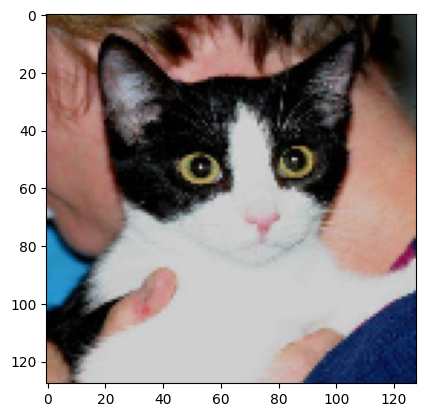

In [42]:
index =12
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + class_name[train_set_y[0, index]] +  "' picture.")
